In [129]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [130]:
#topStared=pd.read_csv('data/TopStaredRepositories.csv', sep=",")
#commits=pd.read_csv('data/commitsTopStaredRepositories.csv', sep=",")
#flask=pd.read_csv('data/pallets_flask.csv', sep=",")

## Data Info

In [131]:
 
import os
import pandas as pd

# Specify the folder path containing CSV files
folder_path = 'data/mqp_repo_data/test'

 
df = pd.DataFrame()

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)

        try:
            current_df = pd.read_csv(file_path, on_bad_lines='skip')
            df = pd.concat([df, current_df], ignore_index=True)
        except pd.errors.ParserError as e:
            print(f"Error reading {filename}: {e}")
            
            
df = df.rename(columns={'fileTuple<name.size>': 'name-size'})

In [132]:
print(df.head())

     owner   repo                                                name-size
0  alibaba  druid                  ('main/.github/workflows/ci.yaml', 800)
1  alibaba  druid                                 ('main/.gitignore', 397)
2  alibaba  druid  ('main/.mvn/wrapper/MavenWrapperDownloader.java', 4940)
3  alibaba  druid           ('main/.mvn/wrapper/maven-wrapper.jar', 50710)
4  alibaba  druid      ('main/.mvn/wrapper/maven-wrapper.properties', 218)


### Split data

In [133]:
df[['filePath', 'fileSize','idk']] = df['name-size'].str.strip("()").str.split(', ', expand=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88270 entries, 0 to 88269
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   owner      88270 non-null  object
 1   repo       88270 non-null  object
 2   name-size  88270 non-null  object
 3   filePath   88270 non-null  object
 4   fileSize   88270 non-null  object
 5   idk        2 non-null      object
dtypes: object(6)
memory usage: 4.0+ MB


In [135]:
df['owner'].value_counts().head()

owner
apple          25449
apache         21953
alibaba        16275
ApacheInfra     5475
ansible         4975
Name: count, dtype: int64

In [136]:
df['repo'].value_counts().head()

repo
swift       25018
spark       21953
druid        6170
superset     5475
ansible      4975
Name: count, dtype: int64

In [137]:
print("Unique Owner:", df['owner'].nunique())
print("Unique Repo:",  df['repo'].nunique())

Unique Owner: 22
Unique Repo: 27


## Data Cleaning 

In [138]:
not_null_rows = df[df['idk'].notna()]

 
print(not_null_rows)

        owner   repo  \
48326  apache  spark   
48327  apache  spark   

                                                                                                                                                        name-size  \
48326  ('main/sql/hive/src/test/resources/golden/Partition pruning - non-partitioned, non-trivial project - query test-0-3893ec7a86062215d9f817f1495a69bb', 1954)   
48327  ('main/sql/hive/src/test/resources/golden/Partition pruning - non-partitioned, non-trivial project - query test-0-eabbebd5c1d127b1605bfec52d7b7f3f', 1954)   

                                                                           filePath  \
48326  'main/sql/hive/src/test/resources/golden/Partition pruning - non-partitioned   
48327  'main/sql/hive/src/test/resources/golden/Partition pruning - non-partitioned   

                                                                   fileSize  \
48326  non-trivial project - query test-0-3893ec7a86062215d9f817f1495a69bb'   
48327  non-

In [139]:
#find all the values in "idk" and replace with file size 
def replace_with_idk_value(df, row_indices, target_column):
    for row_index in row_indices:
        if pd.notna(df.loc[row_index, 'idk']):
            df.loc[row_index, target_column] = df.loc[row_index, 'idk']


not_null_rows = df[df['idk'].notna()]
row_numbers = not_null_rows.index.tolist()
replace_with_idk_value(df, row_numbers, 'fileSize')


In [140]:
df.isnull().sum()

owner            0
repo             0
name-size        0
filePath         0
fileSize         0
idk          88268
dtype: int64

In [141]:
df= df.drop(columns=['name-size','idk'])
df['fileSize'] = df['fileSize'].astype(int)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88270 entries, 0 to 88269
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   owner     88270 non-null  object
 1   repo      88270 non-null  object
 2   filePath  88270 non-null  object
 3   fileSize  88270 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 2.4+ MB


# EDA

In [143]:
df.head()

,owner,repo,filePath,fileSize
0,alibaba,druid,'main/.github/workflows/ci.yaml',800
1,alibaba,druid,'main/.gitignore',397
2,alibaba,druid,'main/.mvn/wrapper/MavenWrapperDownloader.java',4940
3,alibaba,druid,'main/.mvn/wrapper/maven-wrapper.jar',50710
4,alibaba,druid,'main/.mvn/wrapper/maven-wrapper.properties',218


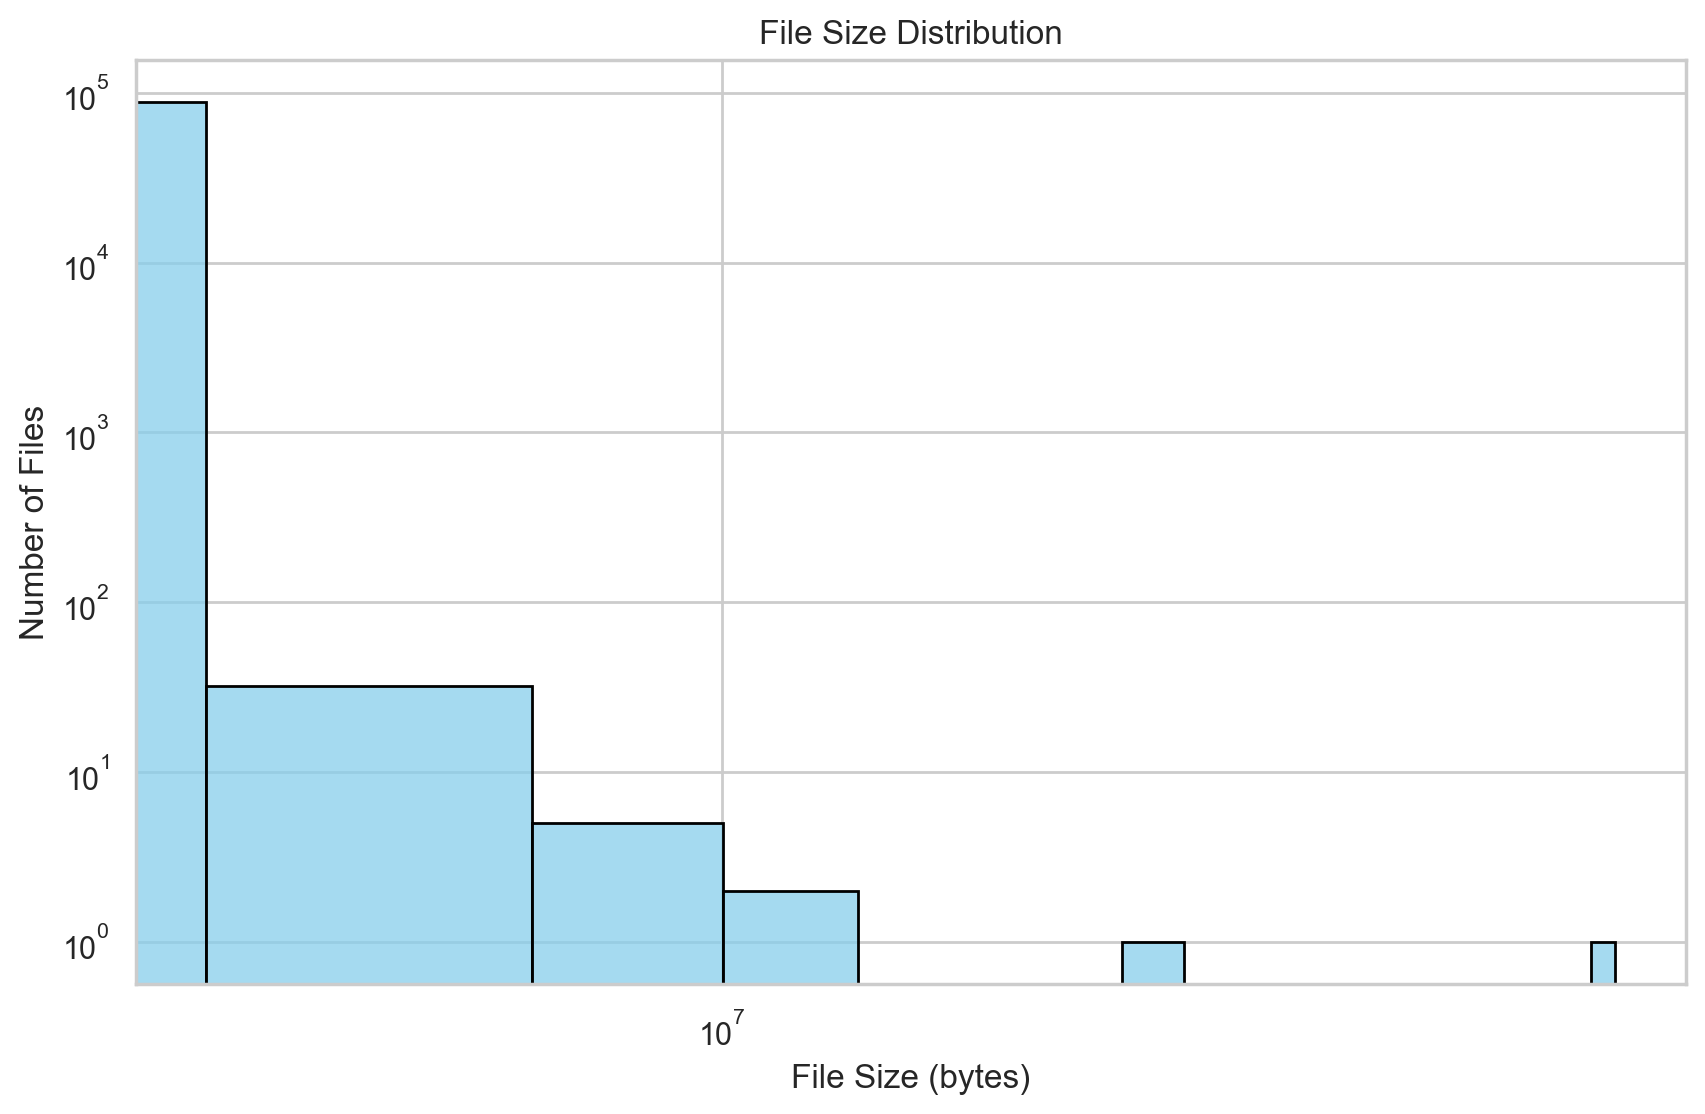

In [144]:
 
sns.set(style="whitegrid")

 
plt.figure(figsize=(10, 6))
sns.histplot(df['fileSize'], bins=20, color='skyblue', edgecolor='black')
plt.title('File Size Distribution')
plt.xlabel('File Size (bytes)')
plt.ylabel('Number of Files')
plt.xscale('log')
plt.yscale('log')
plt.show()

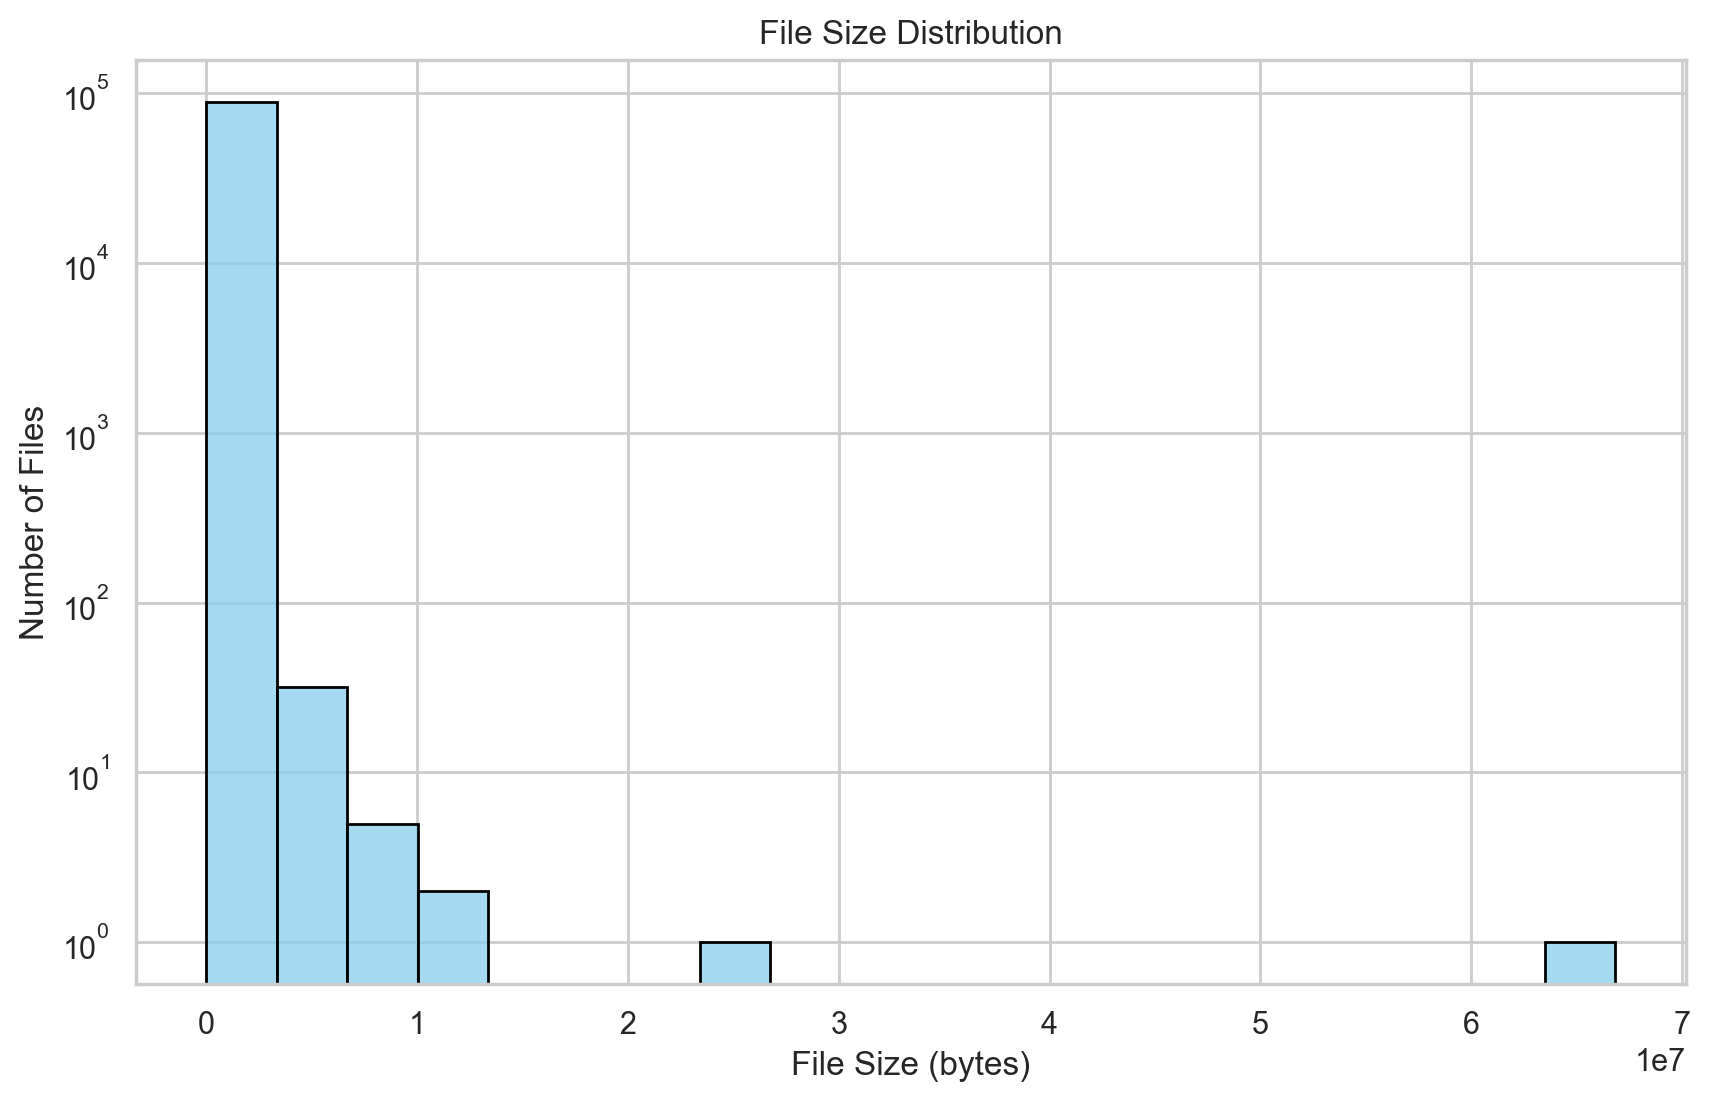

In [145]:
 
 
plt.figure(figsize=(10, 6))
sns.histplot(df['fileSize'], bins=20, color='skyblue', edgecolor='black')
plt.title('File Size Distribution')
plt.xlabel('File Size (bytes)')
plt.ylabel('Number of Files')
plt.yscale('log')
plt.show()

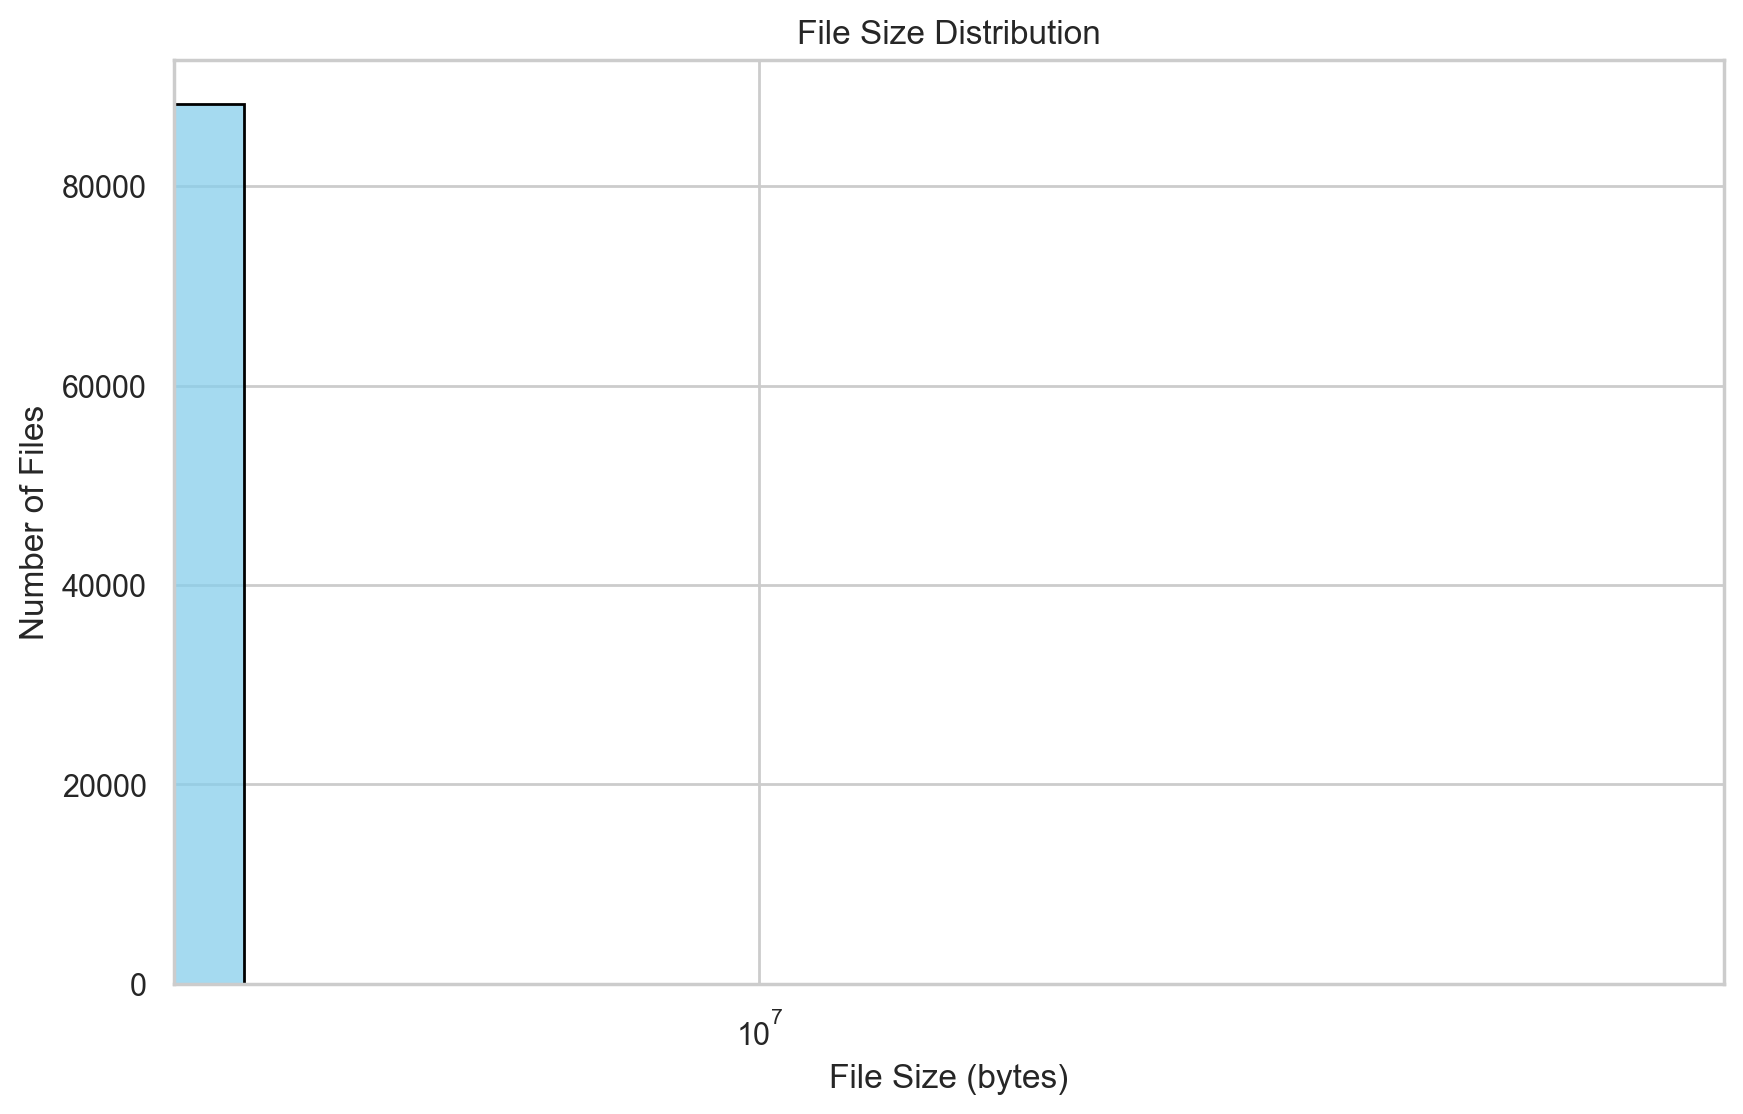

In [146]:
 
plt.figure(figsize=(10, 6))
sns.histplot(df['fileSize'], bins=20, color='skyblue', edgecolor='black')
plt.title('File Size Distribution')
plt.xlabel('File Size (bytes)')
plt.ylabel('Number of Files')
plt.xscale('log')
plt.show()

In [147]:
column_description = df['fileSize'].describe()

 
print(column_description)

count    8.827000e+04
mean     1.400106e+04
std      2.818721e+05
min      0.000000e+00
25%      4.410000e+02
50%      1.447500e+03
75%      4.318000e+03
max      6.684598e+07
Name: fileSize, dtype: float64


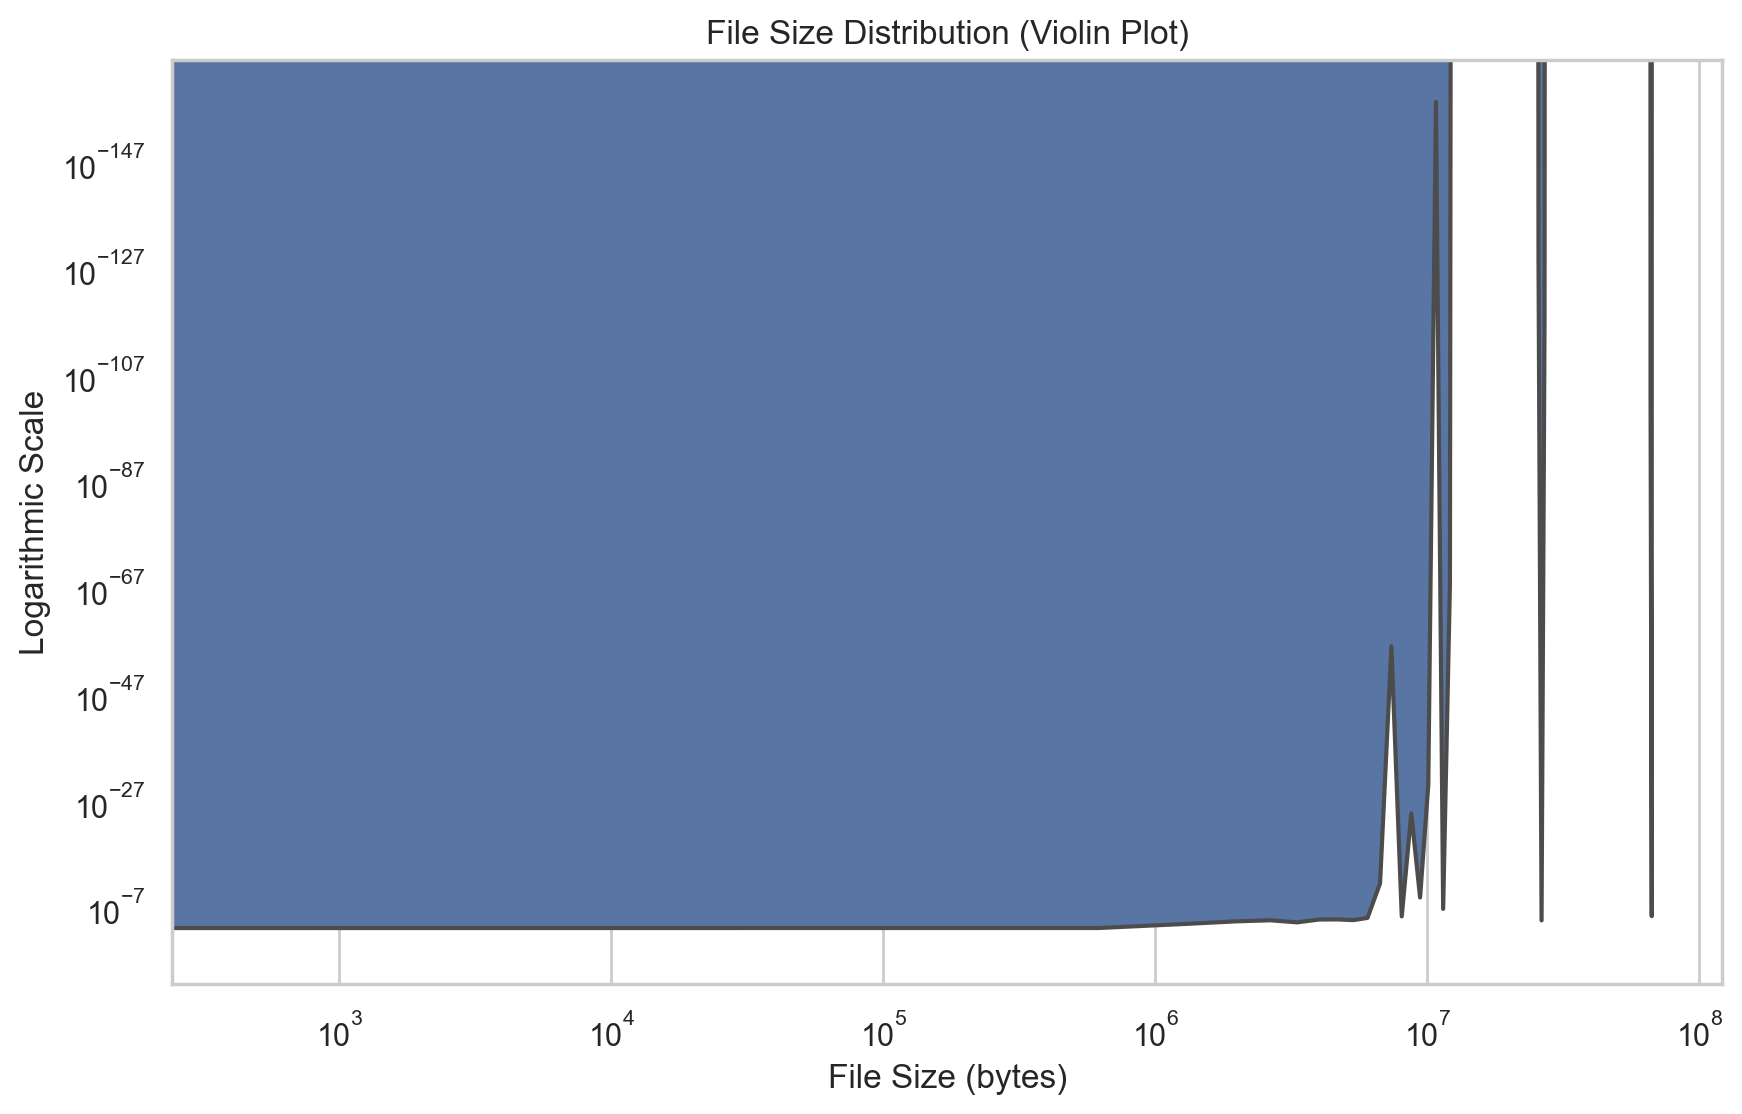

In [148]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='fileSize', data=df)
plt.title('File Size Distribution (Violin Plot)')
plt.xlabel('File Size (bytes)')
plt.ylabel('Logarithmic Scale')
plt.yscale('log')
plt.xscale('log')
plt.show()

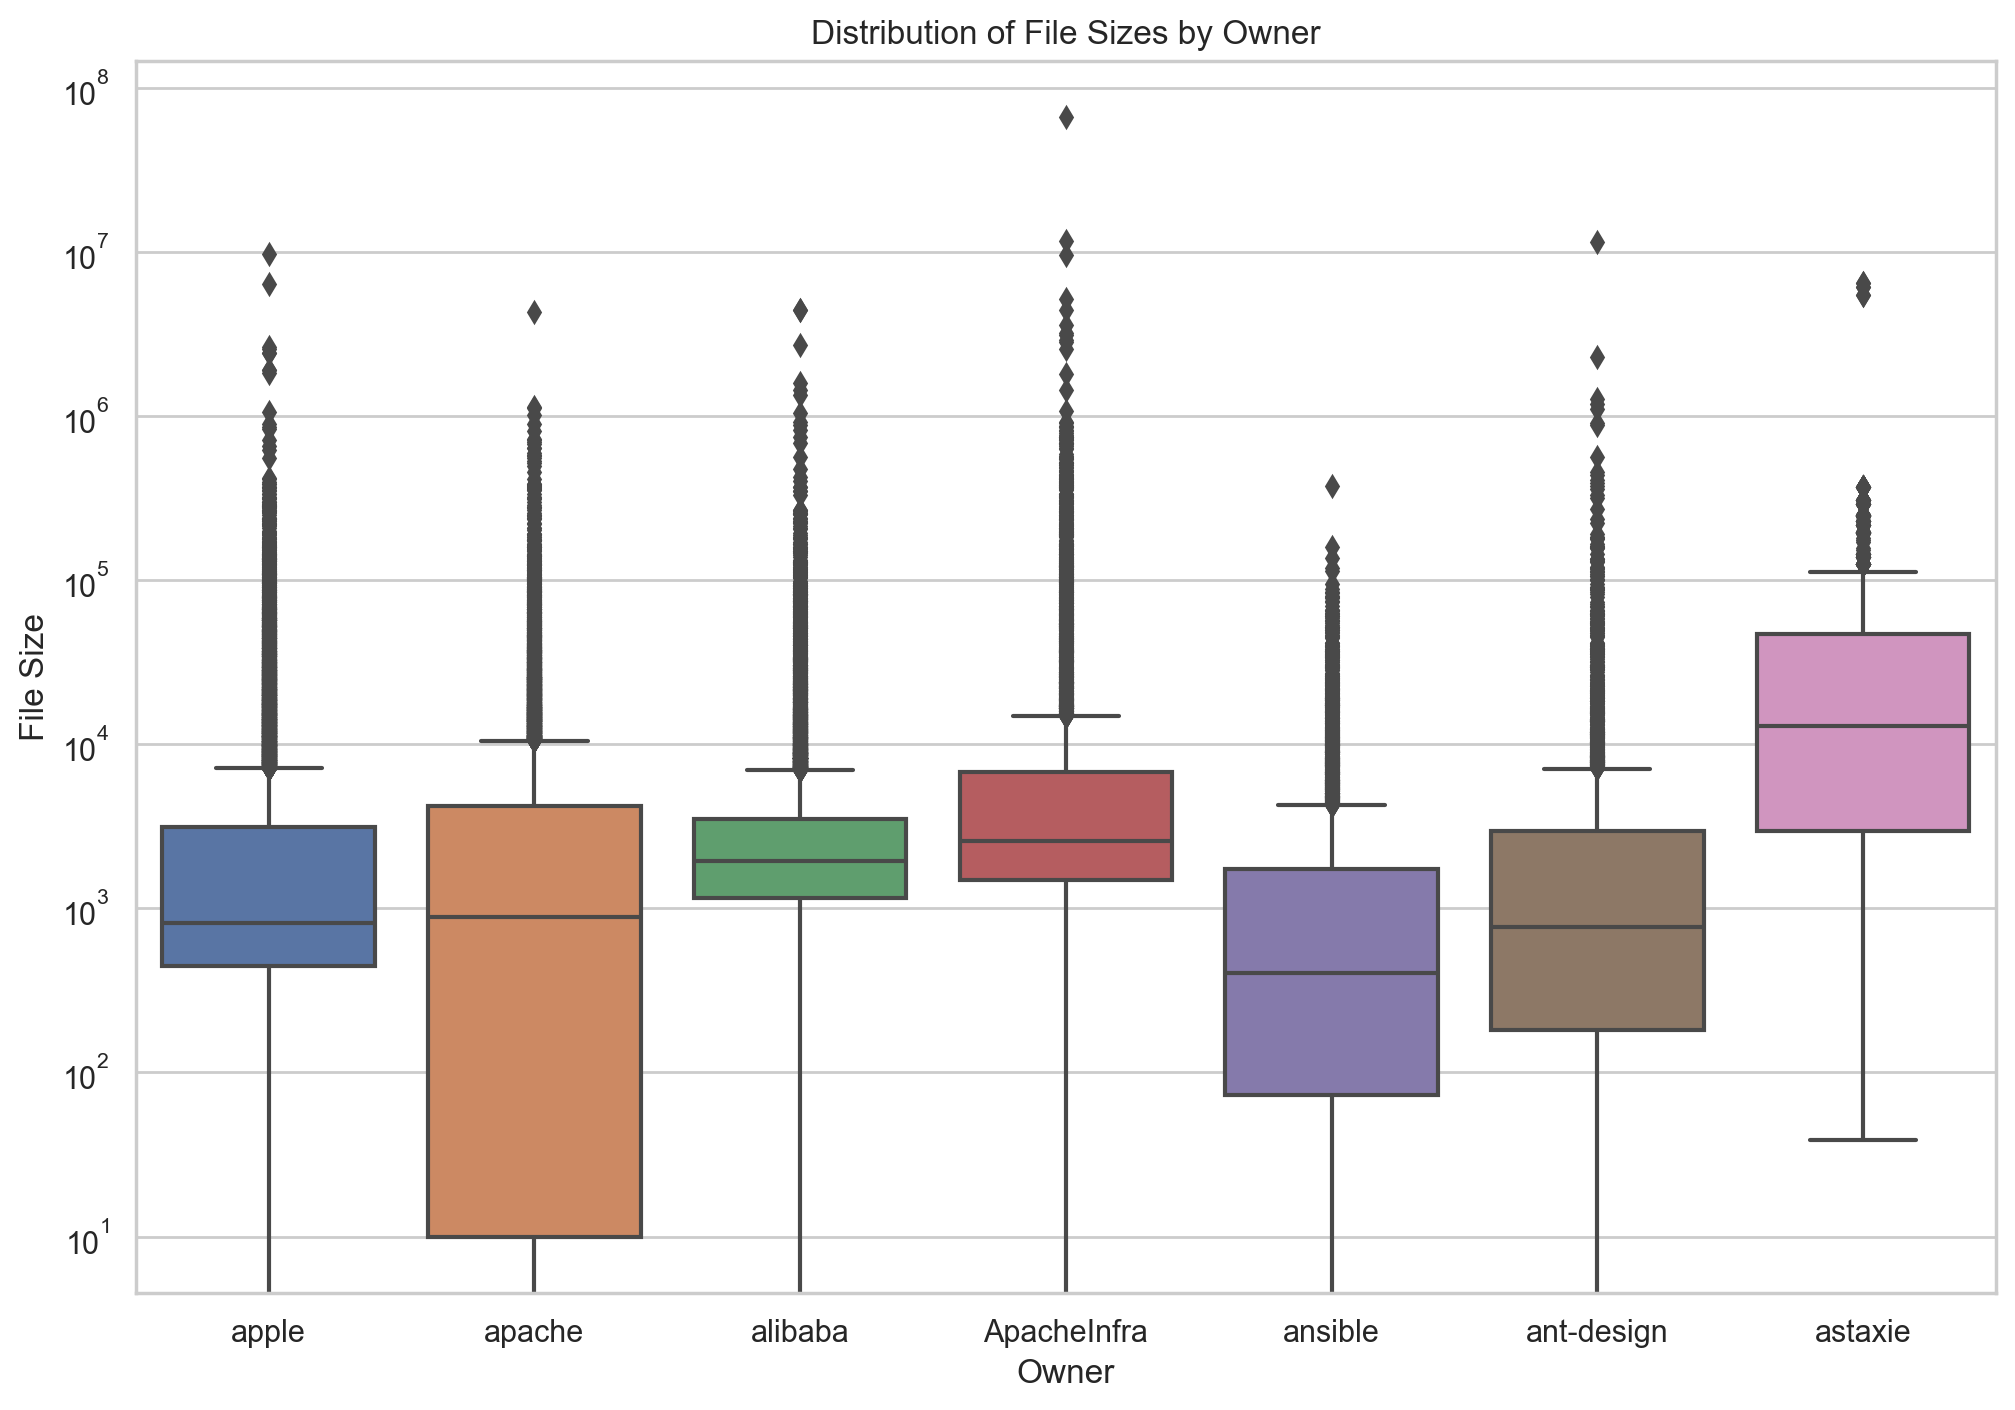

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

top_owners = df['owner'].value_counts().head(7).index
filtered_df = df[df['owner'].isin(top_owners)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='owner', y='fileSize', data=filtered_df, order=top_owners)
plt.title('Distribution of File Sizes by Owner')
plt.xlabel('Owner')
plt.ylabel('File Size')
plt.yscale('log')

plt.show()


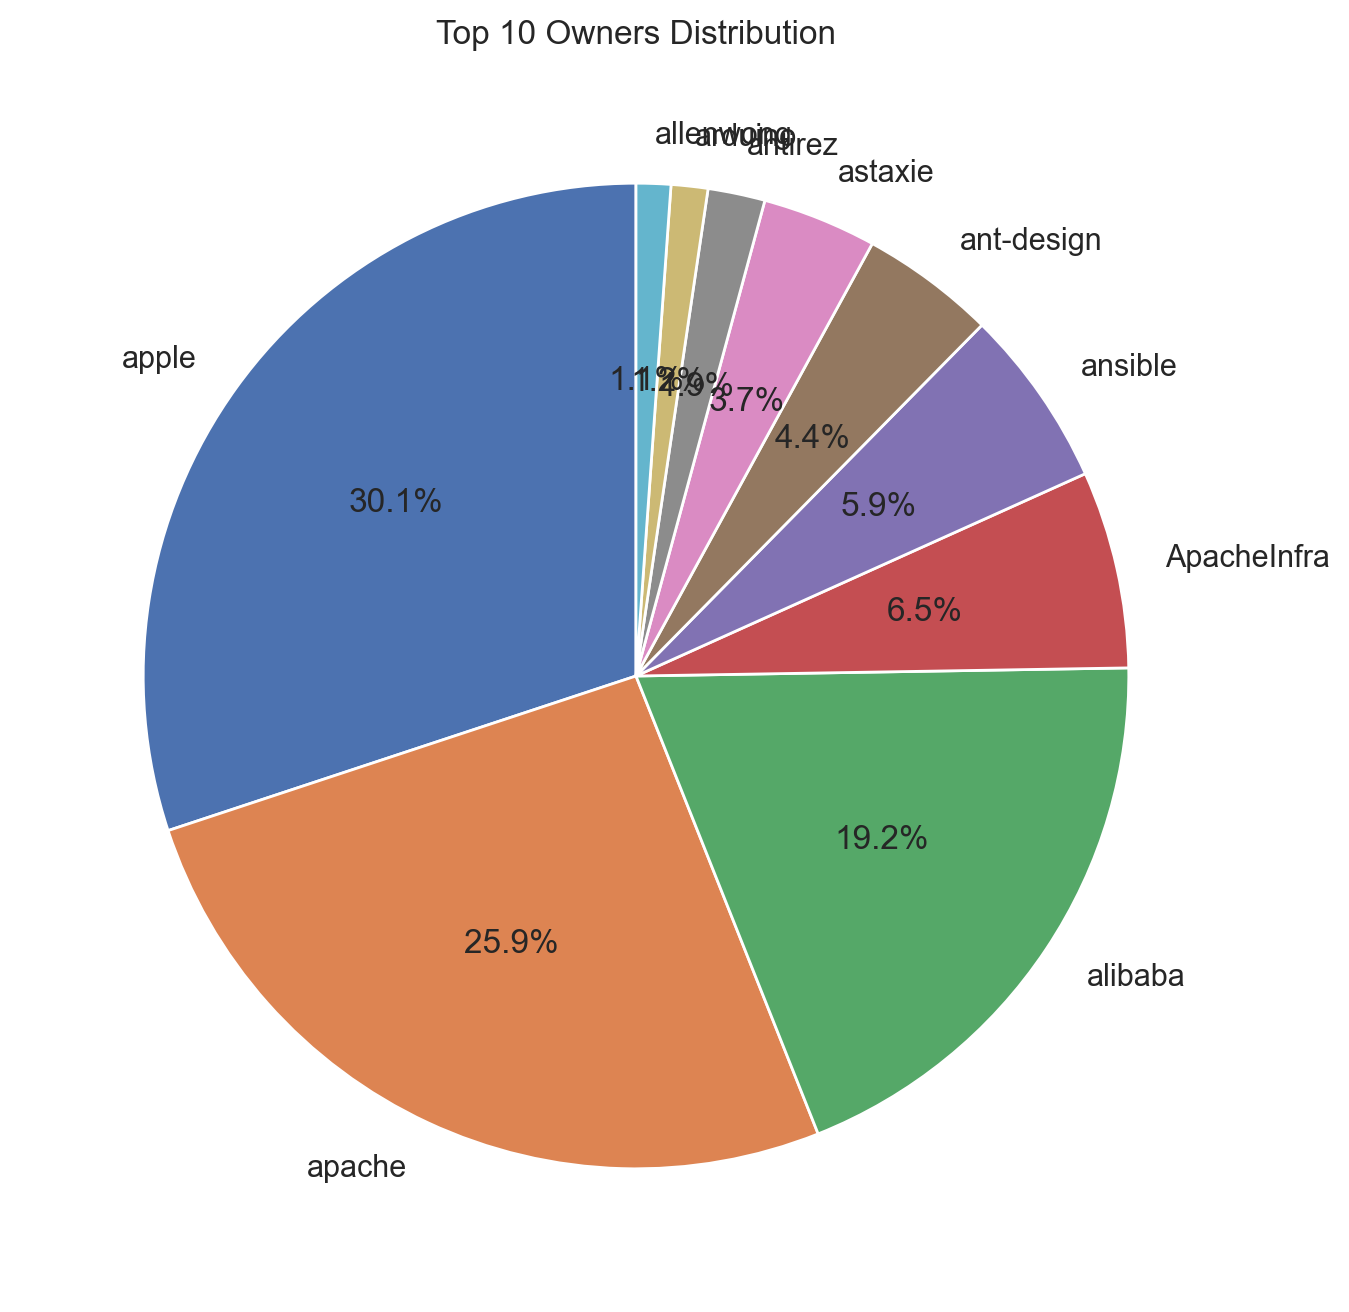

In [116]:
import matplotlib.pyplot as plt


top_owners = df['owner'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_owners, labels=top_owners.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Owners Distribution')
plt.show()


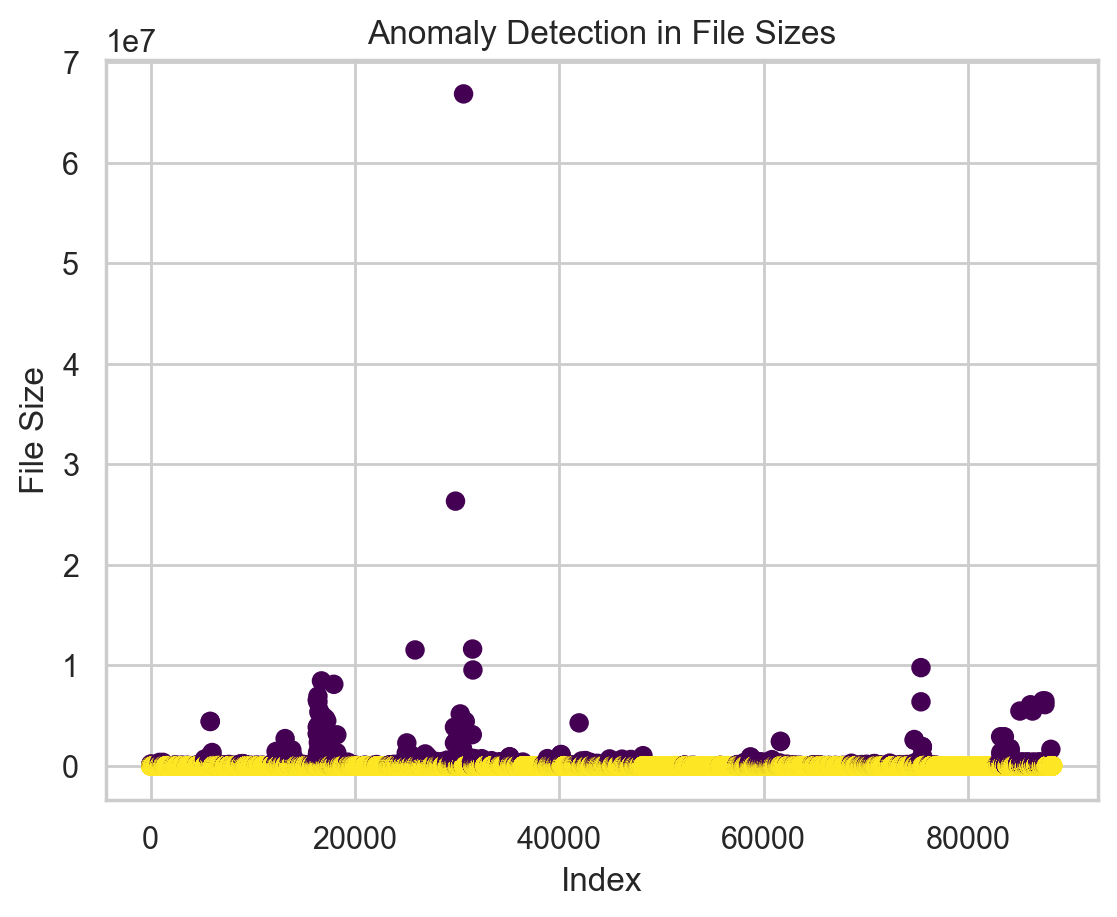

Rows with anomalies:
         owner    repo  \
3      alibaba   druid   
20     alibaba   druid   
21     alibaba   druid   
22     alibaba   druid   
23     alibaba   druid   
...        ...     ...   
87706    atech  postal   
87713    atech  postal   
88105    atech  postal   
88106    atech  postal   
88109    atech  postal   

                                                                      filePath  \
3                                        'main/.mvn/wrapper/maven-wrapper.jar'   
20              'main/core/src/main/java/com/alibaba/druid/filter/Filter.java'   
21       'main/core/src/main/java/com/alibaba/druid/filter/FilterAdapter.java'   
22         'main/core/src/main/java/com/alibaba/druid/filter/FilterChain.java'   
23     'main/core/src/main/java/com/alibaba/druid/filter/FilterChainImpl.java'   
...                                                                        ...   
87706                                 'main/app/assets/images/spinner-sub.gif'   
87713     

In [154]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


file_sizes = df['fileSize'].values.reshape(-1, 1)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset
model.fit(file_sizes)

# Predict anomalies (outliers)
df['anomaly'] = model.predict(file_sizes)

 
plt.scatter(df.index, df['fileSize'], c=df['anomaly'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('File Size')
plt.title('Anomaly Detection in File Sizes')
plt.show()
 
anomalies = df[df['anomaly'] == -1]
print("Rows with anomalies:")
print(anomalies)
